In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [84]:
train = pd.read_csv('./datasets/mnist_train.csv')
test = pd.read_csv('./datasets/mnist_test.csv')


x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]

y_train = train.iloc[:,0]
y_test = test.iloc[:,0]

train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))

Training set has 59999 rows and 785 columns
Test set has 9999 rows and 785 columns


### Data visualisation

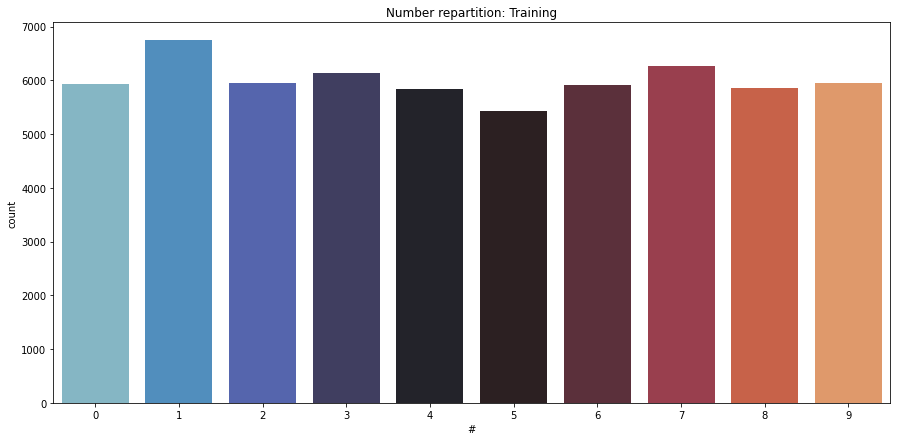

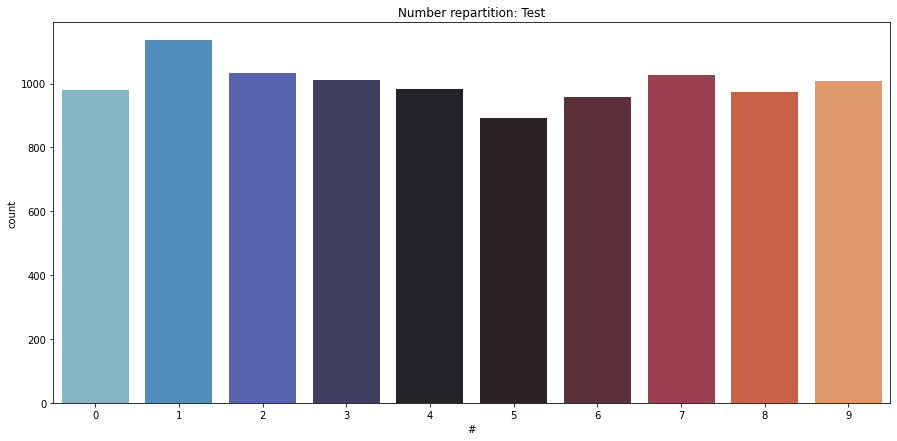

In [82]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_train,palette="icefire")
plt.xlabel('#')
plt.title('Number repartition: Training')
plt.show()

plt.figure(figsize=(15,7))
sns.countplot(x=y_test,palette="icefire")
plt.xlabel('#')
plt.title('Number repartition: Test')
plt.show()

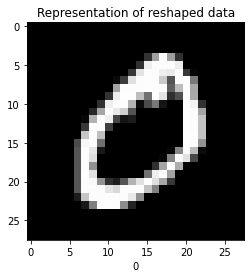

In [78]:
img=x_train.iloc[0].to_numpy()
img=img.reshape((28,28)) #28*28=784
plt.imshow(img,cmap="gray")
plt.xlabel(y_train.iloc[0])
plt.title('Representation of reshaped data')
plt.show()

### Data preprocessing

In [71]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train_reshaped=x_train.values.reshape(-1,28,28,1)
x_test_reshaped=x_test.values.reshape(-1,28,28,1)

print("X Train Shape: ",x_train_reshaped.shape)
print("X Test Shape: ",x_test_reshaped.shape)

y_train_reshaped = to_categorical(y_train,num_classes=10)
y_test_reshaped = to_categorical(y_test,num_classes=10)

print("Y Train Shape: ",y_train_reshaped.shape)
print("Y Test Shape: ",y_test_reshaped.shape)

X Train Shape:  (59999, 28, 28, 1)
X Test Shape:  (9999, 28, 28, 1)
Y Train Shape:  (59999, 10)
Y Test Shape:  (9999, 10)


### CNN implementation

In [72]:
num_classes = 10
input_shape = (28, 28, 1)

models = {
    'Simple' :Sequential(
        [
            Input(shape=input_shape),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            Flatten(),
            Dense(num_classes, activation="softmax"),
        ]
    )
,
    '2 cnn layers': Sequential(
        [
            Input(shape=input_shape),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
}
_ = [models[model].summary() for model in models]

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 flatten_14 (Flatten)        (None, 21632)             0         
                                                                 
 dense_14 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPo

In [73]:
batch_size = 128
epochs = 15
learning_rate = 0.001
_ = [models[model].compile(loss='categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy']) for model in models]

In [74]:
histories = [models[model].fit(
    x_train_reshaped, y_train_reshaped,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1) for model in models]

Epoch 1/15
422/422 [==============================] - 7s 16ms/step - loss: 0.2827 - accuracy: 0.9190 - val_loss: 0.1022 - val_accuracy: 0.9735
Epoch 2/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0951 - accuracy: 0.9731 - val_loss: 0.0701 - val_accuracy: 0.9817
Epoch 3/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.0666 - val_accuracy: 0.9820
Epoch 4/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0646 - val_accuracy: 0.9833
Epoch 5/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0408 - accuracy: 0.9884 - val_loss: 0.0626 - val_accuracy: 0.9840
Epoch 6/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0612 - val_accuracy: 0.9842
Epoch 7/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.0682 - val_accuracy: 0.98

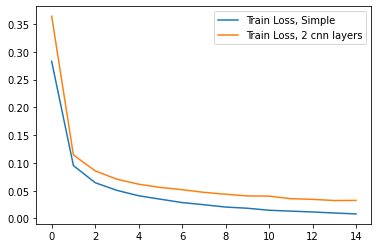

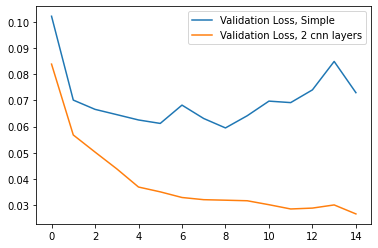

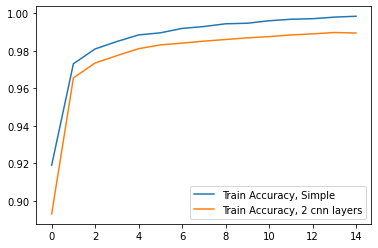

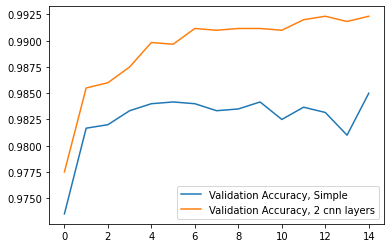

In [93]:
_= [plt.plot(histories[idx].history["loss"], label=f"Train Loss, {name}") for idx, name in enumerate(models)]
plt.legend()
plt.figure()
_= [plt.plot(histories[idx].history["val_loss"], label=f"Validation Loss, {name}") for idx, name in enumerate(models)]
plt.legend()


plt.figure()
_= [plt.plot(histories[idx].history["accuracy"], label=f"Train Accuracy, {name}") for idx, name in enumerate(models)]
plt.legend()
plt.figure()
_= [plt.plot(histories[idx].history["val_accuracy"], label=f"Validation Accuracy, {name}") for idx, name in enumerate(models)]
plt.legend()

In [87]:
scores = [models[model].evaluate(x_test_reshaped, y_test_reshaped, verbose=0) for model in models]
_ = [print("Test loss:", scores[i][0],"Test accuracy:", scores[i][1], "Model: ", name) for i,name in enumerate(models)]

Test loss: 0.07338910549879074 Test accuracy: 0.9804980754852295 Model:  Simple
Test loss: 0.023189229890704155 Test accuracy: 0.9918991923332214 Model:  2 cnn layers


### Sources
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://www.kaggle.com/code/premshah/mnist-dataset-using-keras/notebook
- https://www.kaggle.com/code/software007/cnn-with-mnist-csv-dataset/notebook
- Assignement 10 ML course Bachelor Unifr

#### Hint from course

In [ ]:
"""
CNN with 3 conv layers and a fully connected classification layer
PATTERN RECOGNITION EXERCISE:
Fix the three lines below marked with PR_FILL_HERE
"""

import torch.nn as nn


class Flatten(nn.Module):
    """
    Flatten a convolution block into a simple vector.

    Replaces the flattening line (view) often found into forward() methods of networks. This makes it
    easier to navigate the network with introspection
    """
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x


class PR_CNN(nn.Module):
    """
    Simple feed forward convolutional neural network

    Attributes
    ----------
    expected_input_size : tuple(int,int)
        Expected input size (width, height)
    conv1 : torch.nn.Sequential
    conv2 : torch.nn.Sequential
    conv3 : torch.nn.Sequential
        Convolutional layers of the network
    fc : torch.nn.Linear
        Final classification fully connected layer

    """

    def __init__(self, **kwargs):
        """
        Creates an CNN_basic model from the scratch.

        Parameters
        ----------
        output_channels : int
            Number of neurons in the last layer
        input_channels : int
            Dimensionality of the input, typically 3 for RGB
        """
        super(PR_CNN, self).__init__()

        # PR_FILL_HERE: Here you have to put the expected input size in terms of width and height of your input image
        self.expected_input_size = (______, ______)

        # First layer
        self.conv1 = nn.Sequential(
            # PR_FILL_HERE: Here you have to put the input channels, output channels ands the kernel size
            nn.Conv2d(in_channels=______, out_channels=______, kernel_size=______, stride=3),
            nn.LeakyReLU()
        )

        # Classification layer
        self.fc = nn.Sequential(
            Flatten(),
            # PR_FILL_HERE: Here you have to put the output size of the linear layer. DO NOT change 1536!
            nn.Linear(1536, ______)
        )

    def forward(self, x):
        """
        Computes forward pass on the network

        Parameters
        ----------
        x : Variable
            Sample to run forward pass on. (input to the model)

        Returns
        -------
        Variable
            Activations of the fully connected layer
        """
        x = self.conv1(x)
        x = self.fc(x)
        return x
